In [8]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import to_graph

In [9]:
from IPython.display import Image, display

In [10]:
parser = load_parser()

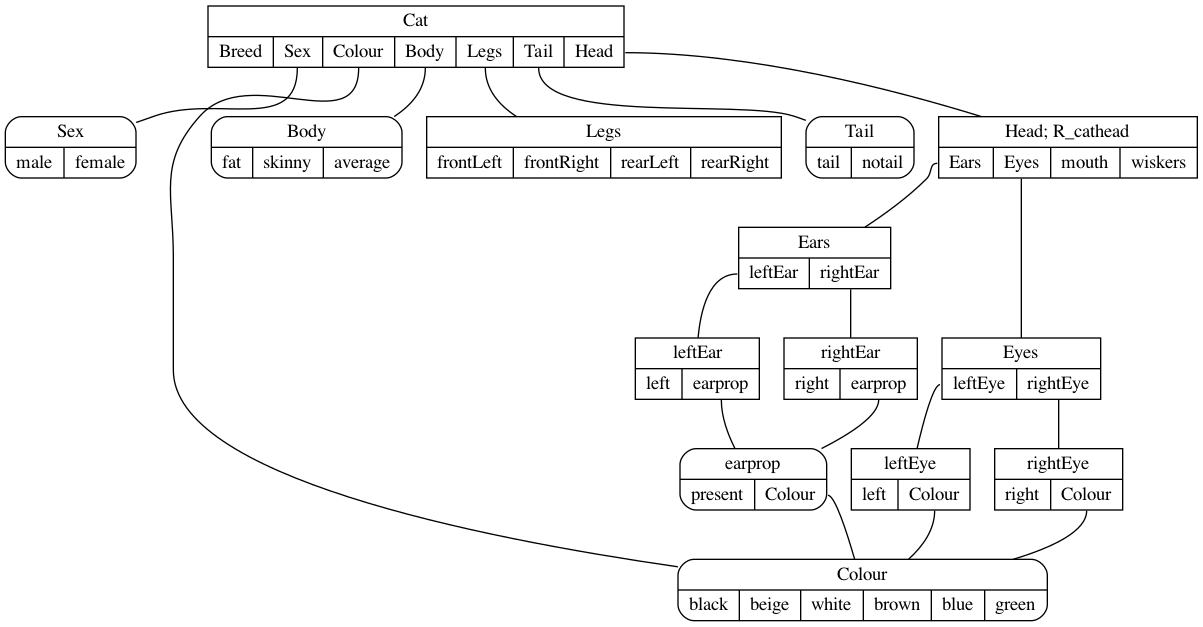

In [11]:
cat_hn = Hypernetwork()

compile_hn(cat_hn, parser, """
    Colour={~black, ~beige, ~white, ~brown, ~blue, ~green}
    Body={~fat, ~skinny, ~average}
    Head=<Ears, Eyes, ~mouth, ~wiskers; R_cathead>
    Ears=<leftEar=<~left, earprop>, rightEar=<~right, earprop>>
    Eyes=<leftEye=<~left, Colour>, rightEye=<~right, Colour>>
    earprop={~present, Colour}
    Cat=<~Breed, Sex={~male, ~female}, Colour, Body, Legs, Tail={~tail, ~notail}, Head>
    Legs=<~frontLeft, ~frontRight, ~rearLeft, ~rearRight>
    tail=<~length>
""")

to_graph(cat_hn, fname="/tmp/cat", view=False)
Image(filename='/tmp/cat.png', width=1200, height=1200)